In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import warnings
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
warnings.filterwarnings('ignore')

# Data loading and overview

In [2]:
train_df = pd.read_csv("dev.csv")
test_df = pd.read_csv("compete.csv")

In [3]:
print("{} Numerical columns, {} Categorial columns".format(list(train_df.select_dtypes(include=[np.number]).shape)[1],
    list(train_df.select_dtypes(include = ['object']).shape)[1]))

39 Numerical columns, 3 Categorial columns


In [4]:
print(f'There are {train_df.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


In [5]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,private,SF,105,147,0,0,0,0,...,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0
1,4,udp,private,SF,105,147,0,0,0,0,...,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0
2,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0
3,0,tcp,http,SF,310,2268,0,0,0,0,...,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0
4,0,udp,domain_u,SF,46,46,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0


In [6]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,345815.000000,3.458150e+05,3.458150e+05,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,...,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000
mean,47.629866,1.652131e+03,8.780215e+02,0.000046,0.006278,0.000014,0.034863,0.000159,0.148238,0.009881,...,188.719954,0.754079,0.031016,0.602577,0.006650,0.176193,0.175861,0.058245,0.057501,0.803088
std,693.577062,5.905801e+04,3.331798e+04,0.006802,0.133003,0.006131,0.786947,0.016919,0.355336,1.534885,...,106.003839,0.410574,0.109775,0.481140,0.041933,0.380109,0.380426,0.230823,0.230283,0.397666
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,42088.000000,5.135678e+06,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,767.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# Data Exploration

* Unbalanced Data

<AxesSubplot:>

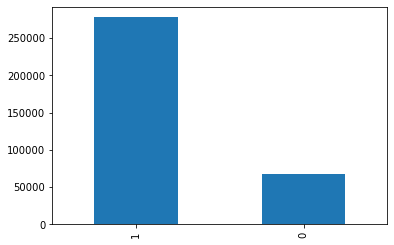

In [8]:
train_df['class'].value_counts().plot.bar()

* Categorical columns

In [9]:
train_df.loc[:, train_df.dtypes == 'object'].columns

Index(['protocol_type', 'service', 'flag'], dtype='object')

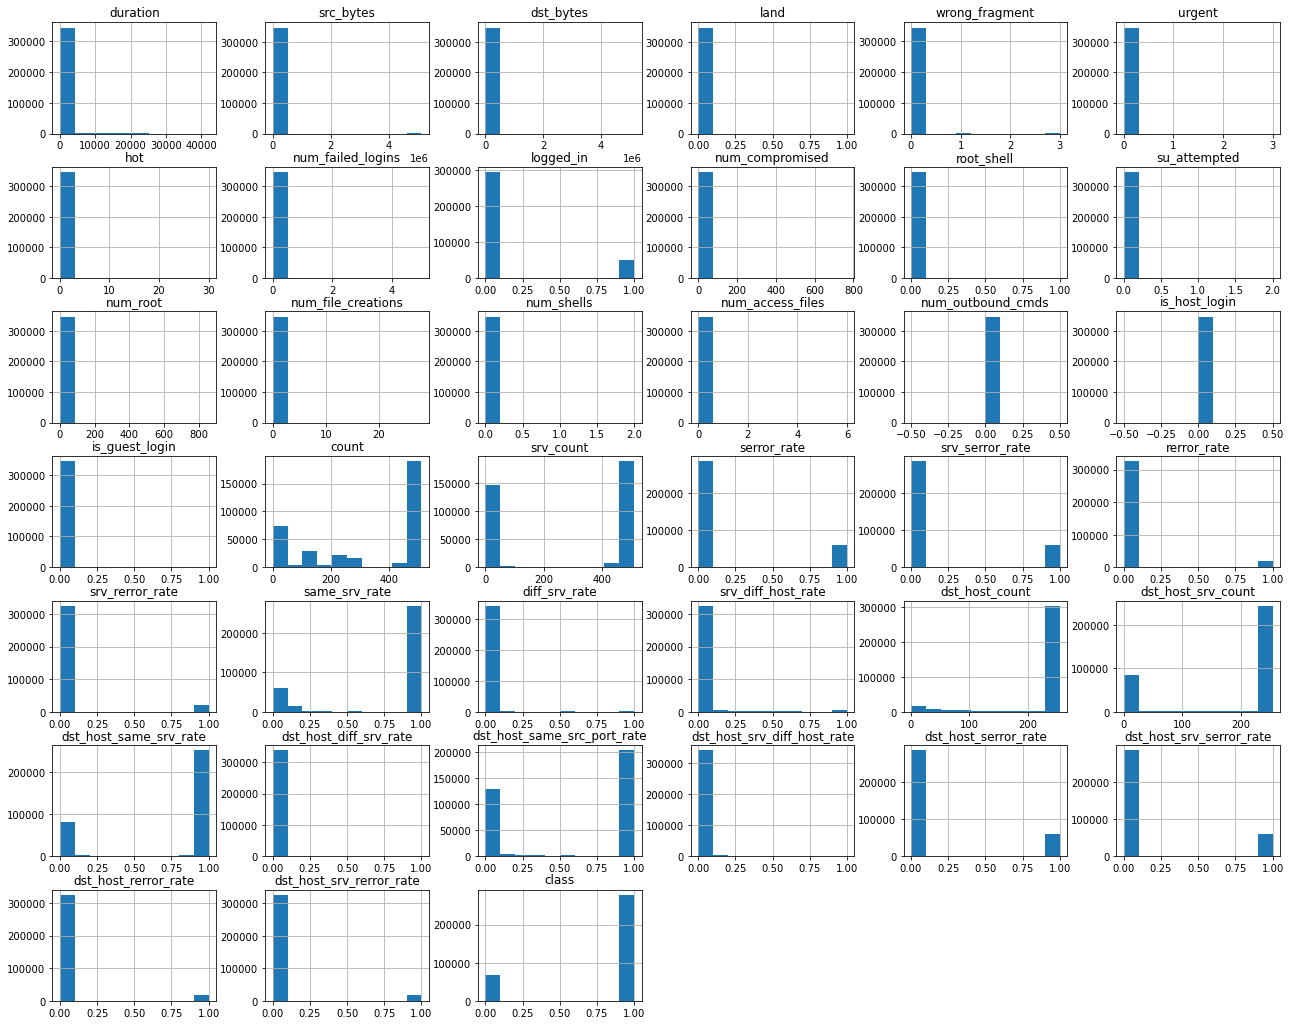

In [10]:
train_df[train_df.columns].hist(figsize=(22,18))

plt.show()

In [11]:
train_df['count'].value_counts(dropna=False, normalize=True).head()

511    0.461200
1      0.079748
510    0.054101
2      0.022555
3      0.011755
Name: count, dtype: float64

In [12]:
train_df['service'].unique()

array(['private', 'http', 'domain_u', 'ftp_data', 'smtp', 'ecr_i',
       'other', 'finger', 'ntp_u', 'auth', 'pop_3', 'eco_i', 'urp_i',
       'IRC', 'ftp', 'telnet', 'urh_i', 'time', 'tim_i', 'X11', 'domain',
       'red_i', 'tftp_u', 'shell', 'ssh', 'sql_net', 'uucp_path', 'efs',
       'netbios_ssn', 'echo', 'Z39_50', 'systat', 'mtp', 'http_443',
       'imap4', 'name', 'netstat', 'rje', 'klogin', 'iso_tsap', 'whois',
       'supdup', 'nnsp', 'discard', 'hostnames', 'exec', 'link', 'kshell',
       'vmnet', 'ldap', 'remote_job', 'gopher', 'daytime', 'bgp', 'uucp',
       'courier', 'login', 'netbios_dgm', 'printer', 'csnet_ns',
       'netbios_ns', 'sunrpc', 'nntp', 'pop_2', 'ctf', 'pm_dump'],
      dtype=object)

In [13]:
train_df['flag'].unique()

array(['SF', 'REJ', 'S1', 'RSTR', 'RSTO', 'S2', 'S0', 'S3', 'OTH', 'SH',
       'RSTOS0'], dtype=object)

In [14]:
train_df['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

### Data Transformation

* OneHotEncoder
* XGBOOST model get better with one hot encoder

In [15]:
# train_df = pd.get_dummies(train_df, columns=['protocol_type'])
# test_df = pd.get_dummies(test_df, columns=['protocol_type'])

* Label Encoder

In [16]:
from sklearn import preprocessing

cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    if col in train_df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(list(train_df[col].astype(str).values) + list(test_df[col].astype(str).values))
        train_df[col] = le.transform(list(train_df[col].astype(str).values))
        test_df[col] = le.transform(list(test_df[col].astype(str).values))   

## K-means

* Optimal value for k according to kmeans is k equal to 3

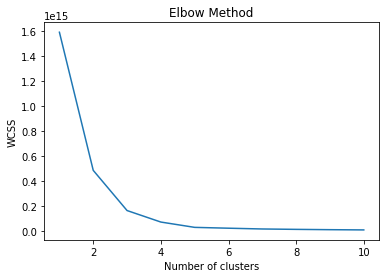

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_df.drop('class', axis=1))

kmeans.cluster_centers_

array([[ 4.70219074e+01,  4.66696359e-01,  2.33913059e+01,
         7.84375587e+00,  1.02869614e+03,  8.78128162e+02,
         4.62731330e-05,  6.27868573e-03,  1.44603540e-05,
         3.45515700e-02,  1.59063895e-04,  1.48134759e-01,
         9.88220596e-03,  1.01222478e-04,  4.33810621e-05,
         1.10592788e-02,  1.09609484e-03,  1.24359045e-04,
         1.00644064e-03,  0.00000000e+00,  0.00000000e+00,
         1.41422263e-03,  3.32466427e+02,  2.93174328e+02,
         1.76127749e-01,  1.76022766e-01,  5.75388477e-02,
         5.78386976e-02,  7.91889130e-01,  2.09653154e-02,
         2.89297024e-02,  2.32473426e+02,  1.88738739e+02,
         7.54058154e-01,  3.10169967e-02,  6.02534119e-01,
         6.63793876e-03,  1.76213672e-01,  1.75881923e-01,
         5.82520613e-02,  5.75074688e-02],
       [ 5.05276190e+03,  1.00000000e+00,  1.95000000e+01,
         9.00000000e+00,  5.13420024e+06,  0.00000000e+00,
         0.00000000e+00,  8.67361738e-19,  1.69406589e-21,
         2.59

In [19]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(train_df['class'], kmeans.labels_))
print(classification_report(train_df['class'], kmeans.labels_))

[[ 68095      0]
 [277678     42]]
              precision    recall  f1-score   support

           0       0.20      1.00      0.33     68095
           1       1.00      0.00      0.00    277720

    accuracy                           0.20    345815
   macro avg       0.60      0.50      0.16    345815
weighted avg       0.84      0.20      0.07    345815



In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(train_df['class'], kmeans.labels_))
print(pd.DataFrame(classification_report(train_df['class'], kmeans.labels_, output_dict=True)))

0.19703309573037606
                      0              1  accuracy      macro avg   weighted avg
precision      0.196936       1.000000  0.197033       0.598468       0.841867
recall         1.000000       0.000151  0.197033       0.500076       0.197033
f1-score       0.329066       0.000302  0.197033       0.164684       0.065040
support    68095.000000  277720.000000  0.197033  345815.000000  345815.000000


In [22]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = train_df.drop('class', axis=1)
y = train_df['class']

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)
print(accuracy_score(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-6.53721532e-02 -3.32870481e-01 -4.79171330e-01  5.12177890e-01
   8.96586309e-03  7.65561995e-03 -6.80218007e-03 -5.21531810e-03
  -1.10365273e-03  1.31228265e-02 -9.17300156e-03  1.31521719e-01
  -2.26818633e-03  6.43699136e-04 -3.74458687e-03 -2.38122163e-03
  -1.18004455e-03  3.18977883e-03  7.33054659e-03  0.00000000e+00
   0.00000000e+00  1.06772532e-02  2.50431286e-01  3.79547797e-01
  -4.62319732e-01 -4.61504190e-01 -2.46437186e-01 -2.44699922e-01
   5.35475994e-01 -2.50883193e-01  3.98384373e-02 -5.47724457e-02
   5.26414478e-01  5.36893656e-01 -2.50608384e-01  3.67619435e-01
  -4.74965983e-03 -4.62087265e-01 -4.61627891e-01 -2.45353520e-01
  -2.42354588e-01]
 [ 1.98111934e-01  1.00877226e+00  1.45214061e+00 -1.55216781e+00
  -2.71712707e-02 -2.32005464e-02  2.06141756e-02  1.58051510e-02
   3.34464699e-03 -3.97690515e-02  2.77990090e-02 -3.98579834e-01
   6.87379499e-03 -1.95074621e-03  1.13480635e-02  7.21635127e-03
   3.57615432e-03 -9.66670396e-03 -2.22154035e-02  0.0000

In [23]:
temp = train_df
temp['class'] = kmeans.labels_

## Model Evaluation

* Train_test_split

In [24]:
# Drop target column
# Drop class column from Train Dataframe
Y_train = train_df['class'];
train_df = train_df.drop('class', axis=1);

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, Y_train, test_size=0.33)

### Model XGBOOST

In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(n_estimators=100, verbosity = 0)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 99.97


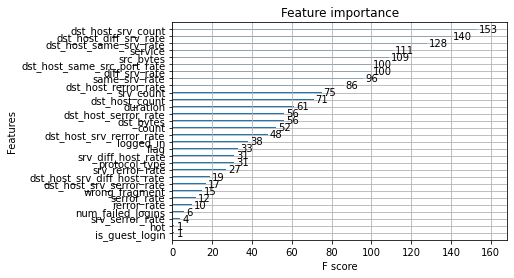

In [27]:
plot_importance(xgb)
plt.show()

### Model LightGBM

In [28]:
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [29]:
# predict the results
y_pred=clf.predict(X_test)

In [30]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)

acc_lgm = (y_pred == y_test).sum().astype(float) / len(y_pred)*100
print("LightGBM's prediction accuracy is: %3.2f" % (acc_lgm))

LightGBM's prediction accuracy is: 99.97


* Precision Score

### Model Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
preds_random_forest = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9881877689078944

### Model Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds_proba = clf.predict_proba(X_test)

preds_regression = clf.predict(X_test)

clf.score(X_test, y_test)

0.9842182283405918

### Model Gaussian Naive Bayes

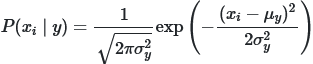

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 114119 points : 4689


### Model validation

* cross_val_score

In [34]:
from sklearn.model_selection import cross_val_score

xgb_cv = XGBClassifier(n_estimators=100, verbosity = 0)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99961157 0.99987052 0.9997842  0.99982736 0.99952525 0.99926629
 0.99965471 0.99969787 0.99991368 0.99930942]
Mean: 0.9996460879399354
Standard Deviation: 0.00021214381582457316


In [35]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(xgb, train_df, Y_train, cv=3)

#### Clean Test dataframe according to kaggle submission

* Drop id values from dataframe

In [36]:
test_id = test_df.Id.values
test_df = test_df.drop("Id", axis=1)

* XGB predictions

In [37]:
preds = xgb.predict(test_df)

* LGBM predictions

In [38]:
preds_lgbm = clf.predict(test_df)

### Submissions

In [39]:
submit = pd.DataFrame({'Id': test_id, 'class':preds})
submit.to_csv('XGB_baseline.csv', index=False)

In [40]:
submit = pd.DataFrame({'Id': test_id, 'class':preds_lgbm})
submit.to_csv('LGBM_baseline.csv', index=False)